<b>Group Number:</b> 
<br><b>Name Group Member 1:</b> 
<br><b>u-Kürzel Group Member 1:</b> 
<br><b>Name Group Member 2:</b> 
<br><b>u-Kürzel Group Member 2:</b> 

# 2 Clustering

In the previous subtask, we explored dimensionality reduction, a category of unsupervised machine learning models. Now, we’ll delve into another class: clustering algorithms. Clustering aims to group data points based on inherent patterns, identifying clusters that best represent the data's structure. Essentially, we can say, “I have these points, and I believe they form groups. Let’s define these groups more concretely and assign new points to the appropriate group as they arrive.” This approach enables a range of clustering algorithms for data exploration.

<br>
<br>
<figure><img align="center" src="https://habrastorage.org/getpro/habr/post_images/8b9/ae5/586/8b9ae55861f22a2809e8b3a00ef815ad.png"><figcaption>*Examples of outcomes from different algorithms from scikit-learn*</figcaption></figure>

The algorithms above represent common clustering methods but don’t cover all. Let’s examine K-means clustering, one of the simplest and most popular clustering algorithms.

## 2.1 K-means Clustering

K-means clustering is a widely-used algorithm that intuitively clusters data points around a set number of "centers" within an unlabeled dataset. This number, $k$, represents the predetermined number of clusters, and each cluster is defined by two main principles:

- The "cluster center" is the arithmetic mean of all points in the cluster.
- Each point is closer to its cluster center than any other center.

These principles underpin the **K-means model**, allowing it to classify new data points as well. Here’s a breakdown of the algorithm:

**Algorithm**: K-means

**Input:** Data set $x^{(i)}, i=1,\ldots,m$

### Steps:

1. **Select $k$:** Choose the number of clusters you consider optimal.
   
2. **Initialize Centroids:** Choose $k$ initial centroids randomly from the data points:
   $
   \mu^{(j)} := \text{RandomChoice}(x^{(1:m)}), \; j=1,\ldots,k
   $

3. **Assign Points to Closest Centroid:** Attribute each observation to the nearest centroid:
   $
   y^{(i)} := \text{argmin}_j \|\mu^{(j)} - x^{(i)}\|_2^2, \; i=1,\ldots,m
   $

4. **Update Centroids:** Set each centroid to the mean of points assigned to it:
   $
   \mu^{(j)} := \frac{\sum_{i=1}^m x^{(i)} \cdot \mathrm{1}\{y^{(i)} = j\}}{\sum_{i=1}^m \mathrm{1}\{y^{(i)} = j\}}, \;\; j=1,\ldots,k
   $

5. **Repeat:** Iterate steps 3 and 4 until convergence (when centroids no longer change).

### Loss Function:
K-means minimizes the sum of distances from each point to its nearest centroid. Although we won’t prove it here, each iteration of the algorithm decreases the total loss function. As there are finitely many clusterings, the algorithm will reach a fixed point and converge within a finite number of steps.

In the following figure you can see what should happen in each iteration of the k-Means algorithm. 
<figure><img align="center" src="images/05.11-expectation-maximization.png">

<div class="alert alert-block alert-success">
<b>Question (2 pts):</b> Describe in your own words what happens when using k-Means.
</div>
<div class="alert alert-block alert-success">
<b>Your Answer:</b> Basically K-means changes the distance between different clusters and also update new centers for each cluster, so that each point in a specific cluster is closer to its cluster center than any other center.
</div>

## 2.2 Developing a simple k-Means implementation
First of all we have to load all required libraries and our data. We begin with the standard imports: numpy, pyplot, seaborn and scikitlearn-datasets.

In [1]:
# Import numpy, pyplot, datasets
import os
os.environ["OMP_NUM_THREADS"] = "2"
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from typing import *
import matplotlib.pyplot as plt
%matplotlib inline

from IPython import display
import ipywidgets as widgets
plt.style.use(['seaborn-v0_8-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from lama.test_functions import UnsupervisedLearning_Tests

test_func = UnsupervisedLearning_Tests()

## CONSTANTS ##
RANDOM_STATE:int = 42

As the next step let's generate a two-dimensional dataset containing four distinct blobs. We will use the following set of 300 data points. To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization.

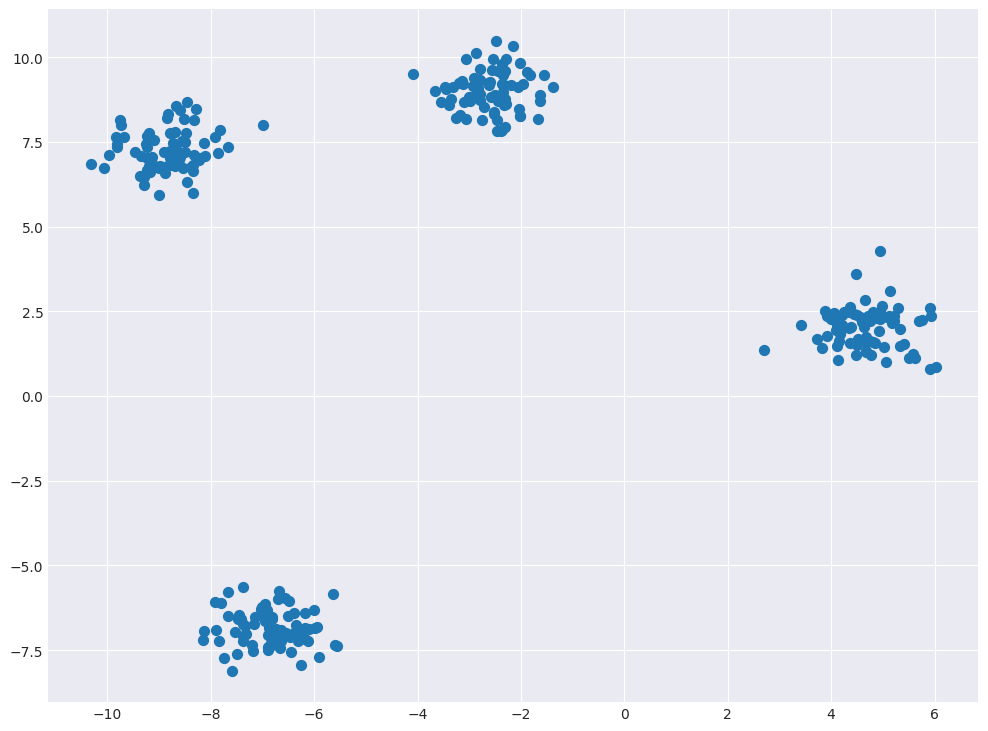

In [2]:
from sklearn.datasets import make_blobs

X_blob, y_blob = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=RANDOM_STATE)
plt.scatter(X_blob[:, 0],X_blob[:, 1], s=50);

<div class="alert alert-block alert-success">
<b>Task:</b> Write a simple implementation of K-means and test it on the generated dataset!

<ul>
<li> Initialize k points as centroids randomly using numpy's RandomState. Make sure to take the first k entries from the generated indices before assigning centroids.</li>
<li> Then, repeat the steps: assign points to the nearest centroid, update centroids, and check for convergence.</li>
<li> Once you're satisfied with your function, use it to calculate clusters on the data generated above (note: the random seed is already fixed).</li>
<li> Visualize the resulting clusters with different colors for each.</li>
<li> Since we generated the data ourselves, we know how many clusters we expect. What value should we use for k?</li>
</ul>
</div>


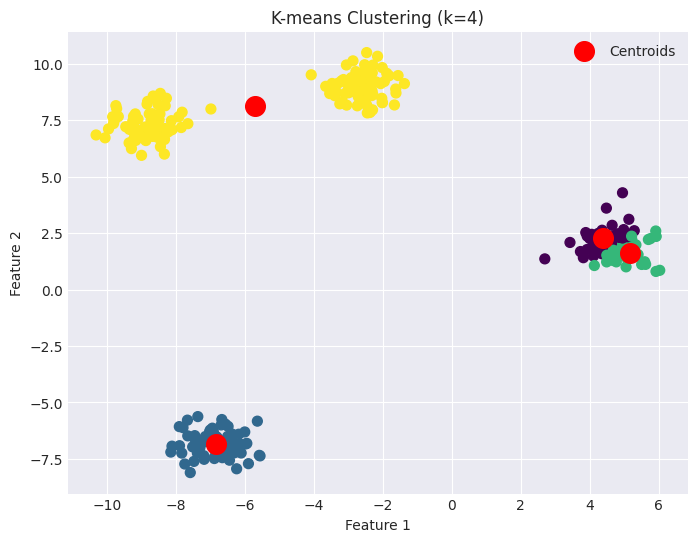

Your data looks alright, you can continue with the workbook.


In [3]:
# use the following import to simplify the implementation
from sklearn.metrics import pairwise_distances_argmin

# 1. Select the number of clusters: This has to be done before the function is called
# rseed is the seed for generation of random numbers
def find_clusters(X: np.ndarray, n_clusters: int, rseed: int) -> Tuple[np.ndarray, np.ndarray]:
    
    # 2. Initialize k points as "centroids" randomly 
    # Please initialize the random number generator with specified random state
    centers: np.ndarray
    labels: np.ndarray
    
    # STUDENT CODE HERE (4 pts)
    rng = np.random.RandomState(rseed)
    index = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[index]
    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == j].mean(0) for j in range(n_clusters)])
        if np.all(centers == new_centers):
            break
        
        centers = new_centers

    # STUDENT CODE until HERE    
    # return the cluster centers and the labels
    return centers, labels

## Use your function to calcualate the clusters and visualise them with different colours

centers: np.ndarray
labels_blob: np.ndarray


def plot_blobs(X, n_clusters, rseed):
    # STUDENT CODE HERE (2 pts)

    centers, labels_blob = find_clusters(X, n_clusters, rseed)

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c = labels_blob, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='o', s=200, label='Centroids')
    plt.title(f'K-means Clustering (k={n_clusters})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
    return centers, labels_blob

    # STUDENT CODE until HERE

centers, labels_blob = plot_blobs(X_blob, 4, RANDOM_STATE)

# Sanity check - compare your results
test_func.test_labels_blob(labels_blob)

<div class="alert alert-block alert-success">
<b>Question (2 pts):</b> Experiment with the random seed by calling the function plot_blobs() in the code box below. What do you observe? What could we do to overcome this?
</div>
<div class="alert alert-block alert-success">
<b>Your Answer:</b> Our clustering with the given seed is not optimal, because the yellow cluster consists of 2 seperate clusters and doesnt have the centroid in them, but between them. Moreover the green and the voilet ones are also overlapping each other. If we chnage the value of rseed then we can also see a change in clusterig, and in some case the clusters look optimal (for ex: rseed = 30,35, 41 etc)
</div>

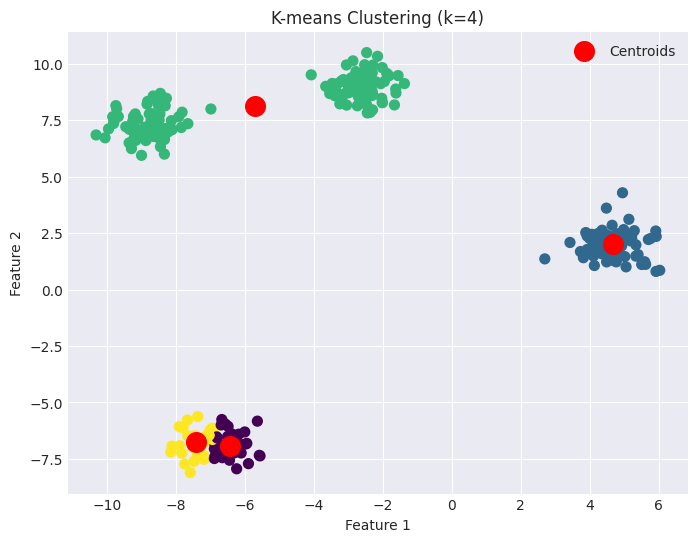

In [4]:
centers, labels_blob = plot_blobs(X_blob, 4, 0)

### 2.2.1 Analyzing another synthetic dataset
We generated our first dataset with the function *make_blobs*. To get a better feeling on the properties of k-Means, we want to analyze the results with another dataset. We import the *make_moons* function from sklearn datasets and generate another dataset, consisting of 300 samples. The noise value $0.05$ to include some deviation in our dataset.



<div class="alert alert-block alert-success">
<b>Task:</b> Use your function to cluster the data and search for two clusters. Show the result in a scatter plot.

</div>

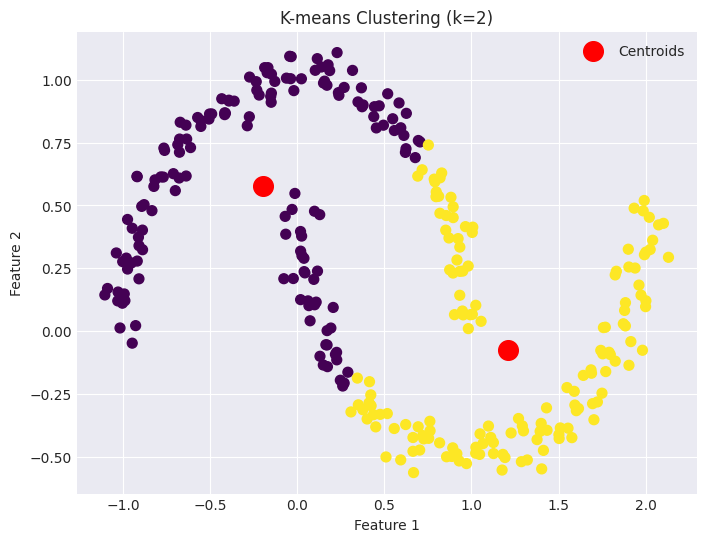

Final Centroids:
[[-0.19713697  0.57586492]
 [ 1.20732539 -0.07380461]]


In [5]:
from sklearn.datasets import make_moons
X_moon, y_moon = make_moons(300, noise=.05, random_state=RANDOM_STATE)

centers: np.ndarray
labels_moon: np.ndarray

# STUDENT CODE HERE (2 pts)
centers, labels_moon = plot_blobs(X_moon, 2, RANDOM_STATE)
print(f"Final Centroids:\n{centers}")


# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Question (2 pts):</b> Answer the following questions in the answer block below and indicate which question your answer is referring to: <br>
    
1. What do you notice? Can you explain why this happens? What constraint of the k-Means algorithm is leading to that result? <br>
2. What happens if we set the value of k to four instead of two? <br>
</div>
<div class="alert alert-block alert-success">
<b>Your Answer:</b> 
    

1.  <br> The clustes are not 2 distinct moon shapes. K-means are designed to work with clusters , which are spherical in nature and dense around the center. Since the moon shapes are curved crescents in nature, the algorithm does not place the centroid inside the actual crescent shape while calculating the mean of all points on it. The algorithm tries to draw spheres around two centers, resulting in the incorrect splits of the curved shapes. The constraint responsible for this is the "Euclidean distance".
2. <br> When we write k = 4 then we get 4 Clusters with 4 centers in the shape of 2 crescents, in which 2 clusters have the same nature as the ones with k=2 and the other 2 at the right and the left most end have their centres almost inside them.
</div>

Whether the result is meaningful is a question that is difficult to answer definitively. We will get to know different approaches in the following tasks.

## 2.3 Evaluating Clustering

As noted at the start of today’s lab, evaluating clustering results can be challenging. For synthetic datasets like the blobs or moons we generated above, we have labeled data that we can use to compare against our clustering results, as these shapes can be seen as predefined classes (clusters). However, in typical unsupervised scenarios, labels are unavailable. So, how can we evaluate clustering without labels?

We can assess clustering by defining a measure of clustering quality. This evaluation provides insights into the ideal number of clusters. There are two types of clustering evaluation metrics:

- **External Metrics**: Use information about the true clusters (when labels are available).
- **Internal Metrics**: Assess clustering quality based solely on the data, without external labels.

Usually, the optimal number of clusters is determined with respect to internal metrics.

### 2.3.1 Using Given Labels in a Simple Table

First, let’s use the known labels. One approach is through **cross-tabulation**, which quantifies the relationship between two variables. In our case, these variables are the actual labels and the estimated clusters.


<div class="alert alert-block alert-success">
<b>Task:</b> 
<ul>
<li> Get the lists of clustering results for the blob dataset and label data
<li> Use the *pandas* library to perform the cross-tabulation.
<li> Set the index and columns of the table correctly. The index should show the true / real cluster, and the column should describe to which cluster the points were allocated.

</li>
</ul>
</div>

In [6]:
# STUDENT CODE HERE (1pt)
pd.crosstab(y_blob, labels_blob, rownames= ['actual_data'], colnames= ['predicted_data'])
# STUDENT CODE until HERE

predicted_data,0,1,2,3
actual_data,,,,
0,0,0,75,0
1,0,75,0,0
2,44,0,0,31
3,0,0,75,0


<div class="alert alert-block alert-success">
<b>Question (1 pt):</b> Do the clusters correspond to the real classes?
</div>
<div class="alert alert-block alert-success">
<b>Your Answer:</b> no
</div>

### 2.3.2 Measuring clustering quality without labels: Silhouette Coefficient

In contrast to the metric described above, the silhouette coefficient does not imply the knowledge about the true labels of the objects. It lets us estimate the quality of the clustering using only the initial, unlabeled samples and the clustering result. To start with, for each observation, the silhouette value (**not to be confused with the silhouette coefficient**) is computed. This value is calculated for each sample separately.

Let's say we have $S_1,\dots,S_n$ samples. For sample $S_1$ we define $a$ to be the mean of the distance between sample $S_1$ and other samples within the same cluster and $b$ to be the mean distance from sample $S_1$ to samples of the nearest different (!) cluster (different from the one $S_1$ belongs to). Then the silhouette value of $S_1$ is $$s = \frac{b - a}{\max(a, b)}.$$ This is repeated for all other samples $S_2,\dots,S_n$.

The silhouette coefficient of a clustering is the mean of all silhouette values. Therefore, the silhouette coefficient shows to which extent the distance between the objects of the same class differ from the mean distance between the objects from different clusters. This coefficient takes values in the $[-1, 1]$ range. Values close to -1 correspond to bad clustering results while values closer to 1 correspond to dense, well-defined clusters. Therefore, the higher the silhouette coefficient is, the better the results from clustering.

<div class="alert alert-block alert-success">
<b>Task:</b> Calculate and display the silhouette coefficient and get the result for the blob data we selected above with the corresponding value for k. Hint: use the scikit-learn library for the calculation.
</div>

0.6522393571662651


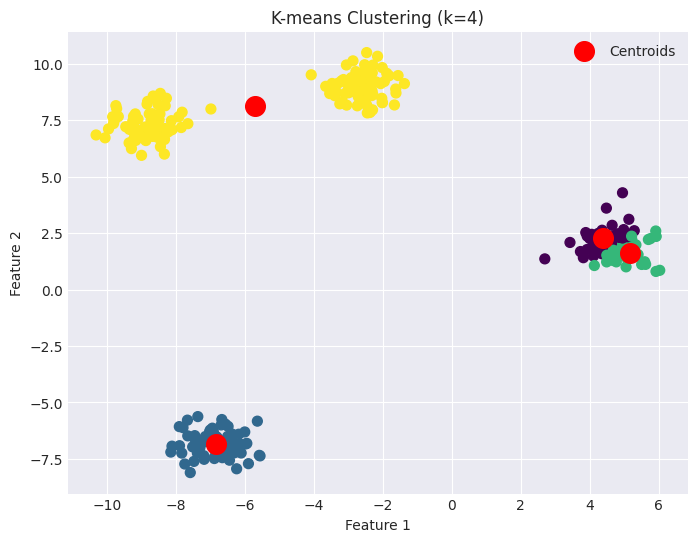

In [7]:
# STUDENT CODE HERE (2 pts)

from sklearn.metrics import silhouette_score
score = silhouette_score(X_blob, labels_blob)
print(score)
X_blob, y_blob = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=RANDOM_STATE)

centers, labels_blob = plot_blobs(X_blob, 4, RANDOM_STATE)

# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Question (1 pt):</b> Which conclusion can we draw from the calculated silhouette coefficient?
</div>
<div class="alert alert-block alert-success">
<b>Your Answer:</b> The Silhouette Score of 0.6522393571662651 (approx 0.65) means that on an averrage scale every data point is 65 percent better matched to its own cluster than it is to the neighboring cluster.
</div>

## 2.4 Clustering with scikit-learn implementation

After we have analyzed our own implementation of K-means we are now able to use the implementation given by scikit-learn. The built-in K-Means uses the KMeans++ initialization by default. Further details on this initialization procedure are given in the appendix. To get consistent and reproducible results, we only have to specify the random state as we did in our own version. One advantage of scikit-learn is that we can directly estimate cluster labels for new samples with a built-in function. Thereby the new samples are assigned to existing clusters. Since k-means remembers the mean of each cluster (the "centroids") it is possible to find the nearest centroid to each new sample and assign the corresponding label.

Now we start to reproduce the results from above with scikit-learn. We we will evaluate if we find the same clusters as before in the blob dataset.


<div class="alert alert-block alert-success">
<b>Task:</b> 
<ul>
<li> Import KMeans from sklearn.cluster.
<li> Using <code>KMeans()</code>, create a KMeans instance to find the correct number of clusters. To specify the number of clusters, use the n_clusters keyword argument. Don't forget to use the notebook's random seed.
<li> Use the <code>.fit()</code> method of model to fit the model to the array of points.
<li> Use the <code>.predict()</code> method of model to predict the cluster labels of our dataset, assigning the result to labels
</li>
</ul>
</div>

Your data looks alright, you can continue with the workbook.


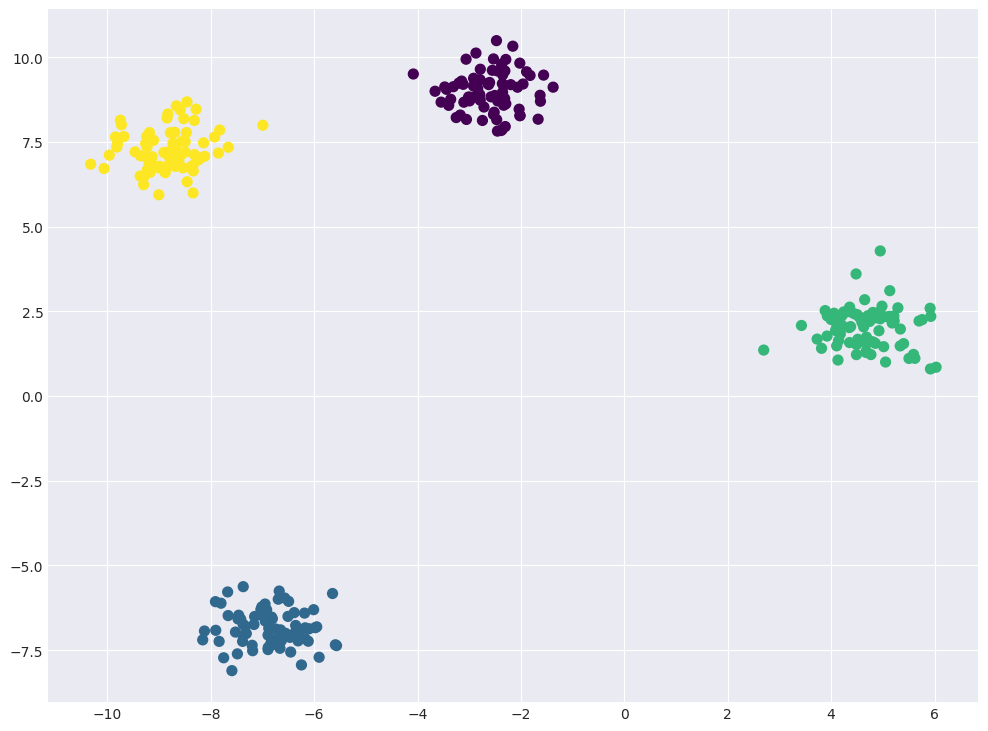

In [8]:
labels_kmeans: np.ndarray

# STUDENT CODE HERE (3 pts)
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=RANDOM_STATE)
model.fit(X_blob)
labels_kmeans = model.predict(X_blob)
# STUDENT CODE until HERE
#plotting is given
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=labels_kmeans, s=50, cmap='viridis');

# Sanity check - compare your results
test_func.test_labels_kmeans(labels_kmeans)

<div class="alert alert-block alert-success">
<b>Question (1 pt):</b> What do you observe? What difference can you see, if you compare the results of our own implementation and the scikit-learn solution?
</div>
<div class="alert alert-block alert-success">
<b>Your Answer:</b> The clusters here are more distinguished, they are seperated in a good way. The yellow cluster is not divided into 2 parts anymore anf the green and voilter ones are also not colliding anymore.
</div>

## 2.5 Choosing a Suitable Value for $k$

An important question when using K-means is: how do we select the algorithm’s hyperparameters, such as the number of clusters $k$? Since we generally have only the sample data and the cluster assignments, we need metrics that depend solely on the data to determine the best value for $k$.

### 2.5.1 Using the Silhouette Coefficient

One way to choose $k$ is by using the silhouette coefficient introduced above. The silhouette can help identify the optimal number of clusters by finding the value of $k$ that maximizes the silhouette coefficient. This approach is especially useful when we don’t know the number of clusters from the data.


<div class="alert alert-block alert-success">
<b>Task:</b> Calculate the silhouette coefficient for different values of k and select the optimal number! The code to plot different ks (a range of k hyperparameters) versus the score has been written for you, so fill out the rest of the code.


</div>

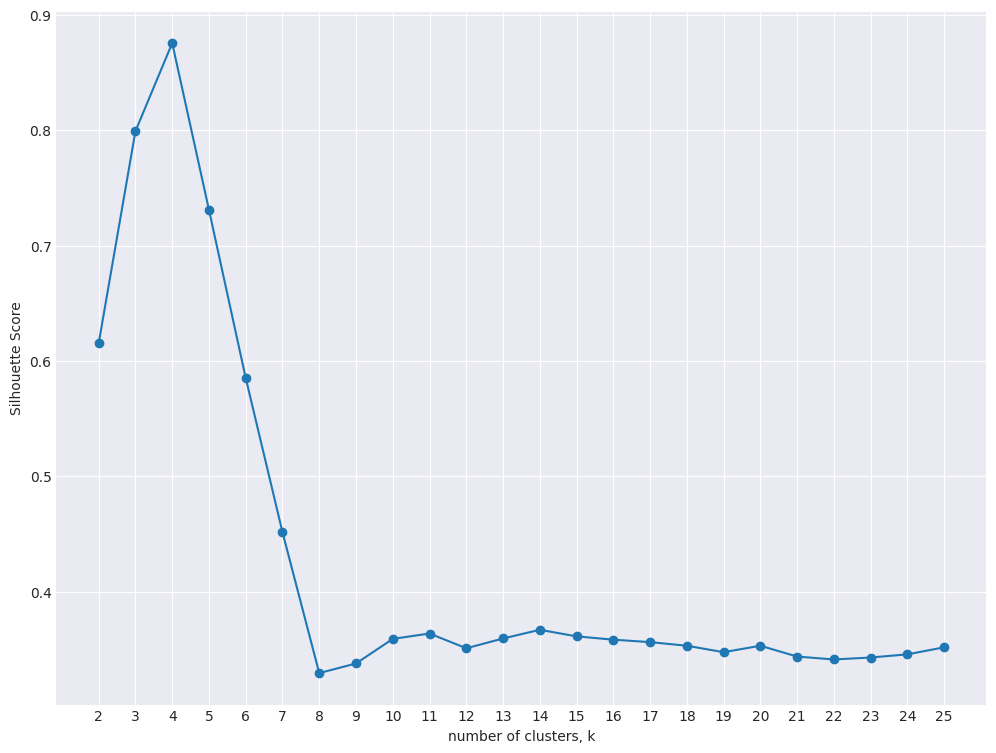

In [9]:
def calculate_k_silhouette(X: np.ndarray, k_min: int, k_max: int) -> Tuple[List[int], List[float]]:
    ks: List[int]
    scores: List[float]

    # STUDENT CODE HERE (4 pts)
    ks = []
    scores = []
    for k in range(k_min, k_max + 1):
        model_k = KMeans(n_clusters=k, random_state=RANDOM_STATE)
        model_k.fit(X_blob)
        labels_k = model_k.predict(X_blob)
        ks.append(k)
        scores.append(silhouette_score(X_blob, labels_k))


    # STUDENT CODE until HERE
    return ks, scores


# call your function with a suitable range for k
ks: List[int]
silhouette_scores: List[float]

# STUDENT CODE HERE (1 pt)

ks, silhouette_scores = calculate_k_silhouette(X_blob, 2, 25)

# STUDENT CODE until HERE

# Plot ks vs silhouette coefficient
plt.plot(ks, silhouette_scores, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Silhouette Score')
plt.xticks(ks)
plt.show()

<div class="alert alert-block alert-success">
<b>Question (1 pt):</b> What number of clusters should we choose according to the silhouette score?
</div>
<div class="alert alert-block alert-success">
<b>Your Answer:</b> 4
</div>

### 2.5.2 Using the Elbow Method

A good clustering groups samples tightly within each cluster, keeping them close to their respective centroids. K-means inherently optimizes the sum of squared distances between observations and their centroids, also known as the *loss function*.

The loss function $J(C)$ for K-means is:

$$
J(C) = \sum_{k=1}^K \sum_{i \in C_k} (x_i - \mu_k)^2 \rightarrow \min_C
$$

Using this loss function as a quality measure makes sense, as we aim for observations to be as close to their centroids as possible. The Elbow Method evaluates how the quality measure changes with different values of $k$, helping us identify the optimal number of clusters. Look for the "elbow point," where adding more clusters begins to yield diminishing improvements in cluster compactness.


<div class="alert alert-block alert-success">
<b>Task:</b> The code to plot different ks versus the loss has been written for you, so fill out the rest of the code. The main steps are:
<ul>
<li> Define the list of k-values
<li> For each of the values of k, perform the following steps:
    <ul>
        <li>1. Fit a K-Means model to the given data samples with k clusters 
        <li>2. Calculate the loss
</li>
</ul>
</li>
</ul>
</div>

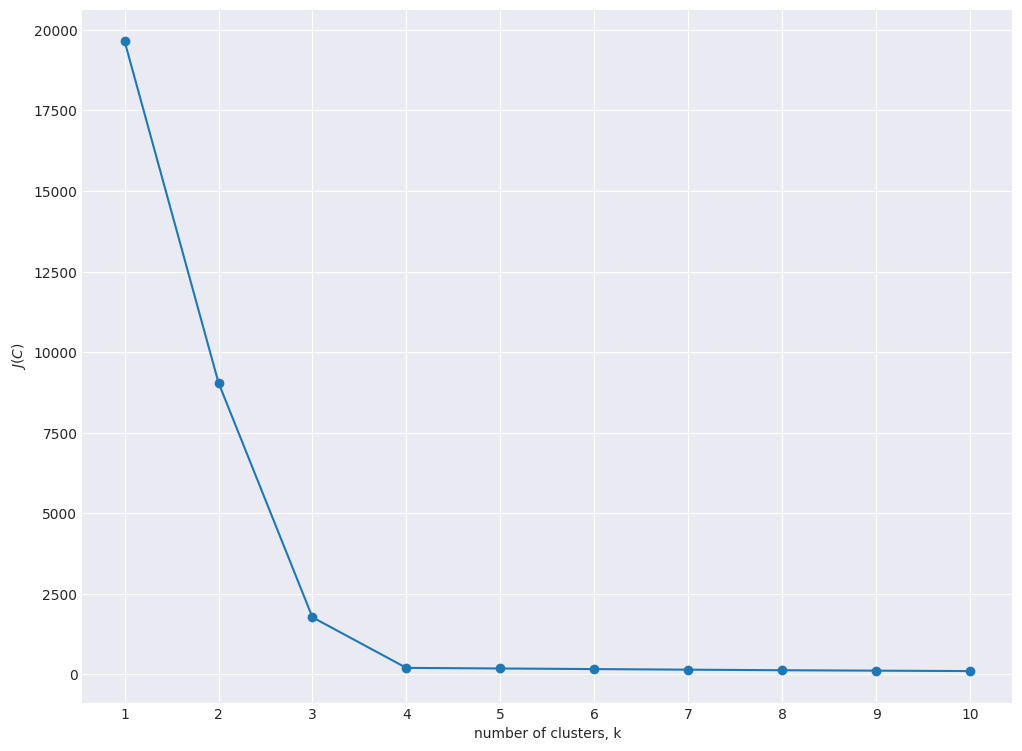

In [10]:
def calculate_k_loss(X: np.ndarray, k_min: int, k_max: int) -> Tuple[List[int], List[float]]:
    ks: List[int]
    losses: List[float]
    # STUDENT CODE HERE (3 pts)
    ks = []
    losses = []
    for k in range(k_min, k_max + 1):
        model_loss = KMeans(n_clusters=k, random_state=RANDOM_STATE)
        model_loss.fit(X_blob)
        labels_loss = model_loss.predict(X_blob)
        ks.append(k)
        losses.append(model_loss.inertia_)

    # STUDENT CODE until HERE
    return ks, losses


# call your function with a suitable range for k
ks: List[int]
losses: List[float]

# STUDENT CODE HERE (1 pt)

ks, losses = calculate_k_loss(X_blob, 1, 10)

# STUDENT CODE until HERE

# Plot ks vs inertias
plt.plot(ks, losses, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('$ J(C)$')
plt.xticks(ks)
plt.show()

<div class="alert alert-block alert-success">
<b>Question (3 pts):</b> Answer the following questions in the answer block below and indicate which question your answer is referring to: <br>
    
1. What problem do we have, if we just try to minimize the loss $J(C_k)$? <br>
2. What can we do to avoid that Problem? How many clusters should we then choose in our case? <br>
</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b>

1. If we just try to minimize the loss function, it decreases as the value of k increases. For example, the value becomes 0 if k = n, which results in an overfiting solution.<br>
2. One solution for this problem, is using a loss function vs k plot (the elbow method), as we can see in the plot above, where the value of the loss function decreases gradually, for the increasing values of k. According to the plot we should use 4 clusters. </div>

To sum up, the process of selecting the number of clusters is typically an imprecise art, and it is _very_ difficult to infer anything about the "real" number of clusters in the data from running k-means (in fact, you should really never try to do this).

# Appendix

## K-Means issues

K-means has a time complexity of $\mathcal{O}\left(n^{\mathcal{O}(d k)}\right)$ [\[Inaba et al.\, 94\]](https://dl.acm.org/doi/10.1145/177424.178042). This means that the time it takes to perform clustering increases exponentially with the number of clusters $k$ and the number of dimensions $d$, and polynomially with the number of observations $n$. There are however some heuristics that allow us to perform faster clustering by giving up a bit of precision. One example of this is MiniBatch K-means, which takes portions (batches) of data instead of fitting the whole dataset and then moves centroids by taking the average of the previous steps. Compare the implementation of K-means and MiniBatch K-means in the [sckit-learn documentation](http://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html).

The [implemetation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) of the algorithm using `scikit-learn` has its benefits such as the possibility to state the number of initializations with the `n_init` function parameter, which enables us to identify more robust centroids. Moreover, these runs can be done in parallel to decrease the computation time.

### K-means clustering with better initialization: KMeans++
Given enough time, K-means will always converge, however this may be to a local minimum. As we have seen, this is highly dependent on the initialization of the centroids. This led to the development of many approaches to address a potential poor clustering: e.g. the computation is often done several times, with different random initializations of the centroids. Another option would be to take the clustering with lowest loss. But the most common heuristic is k-means++: when we are initializing the cluster centers, we don’t select $\mu_{i}$ randomly from all clusters. Instead, we choose $\mu_{i}$ sequentially, sampled with a probability proportional to the minimum squared distance to all other centroids. This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization. After these centers are initialized, we run k-means as normal.

### Steps for performing K-means++ clustering

Given: Dataset $\large \mathbf{X} \in \mathbb{R}^{m \times d}$, number of clusters $\large k$

- Initialize:

  - Choose $\large \mu_{1}$ = Random$\large (\mathbf{X})$

- For $\large j = 2, \dots,k$:

  - For every point $\large x_i$ in $\mathbf{X}$:

    - Get the nearest cluster $\large \mu_{j'}$  ($\large j' < j$) center already found
    
    - Compute the distance $\large D(x_i)$ to the nearest cluster center $\large \mu_{j'}$
    
  - Compute the probabilty $\large p_{x_i} \propto D(x_i)^2$ of every point $\large x_i$ to be chosen as new center
    
  - Choose $\large \mu^{j}$ =  Random $\large ( \mathbf{X}, p )$

## A comparison of the clustering algorithms in scikit-learn
Taken from https://scikit-learn.org/stable/modules/clustering.html#clustering

| Method name                  | Parameters                                              | Scalability                                                 | Usecase                                                                   | Geometry (metric used)                       |
|------------------------------|---------------------------------------------------------|-------------------------------------------------------------|---------------------------------------------------------------------------|----------------------------------------------|
| K-Means                      | number of clusters                                      | Very large n_samples, medium n_clusters with MiniBatch code | General-purpose, even cluster size, flat geometry, not too many clusters  | Distances between points                     |
| Affinity propagation         | damping, sample preference                              | Not scalable with n_samples                                 | Many clusters, uneven cluster size, non-flat geometry                     | Graph distance (e.g. nearest-neighbor graph) |
| Mean-shift                   | bandwidth                                               | Not scalable with n_samples                                 | Many clusters, uneven cluster size, non-flat geometry                     | Distances between points                     |
| Spectral clustering          | number of clusters                                      | Medium n_samples, small n_clusters                          | Few clusters, even cluster size, non-flat geometry                        | Graph distance (e.g. nearest-neighbor graph) |
| Ward hierarchical clustering | number of clusters                                      | Large n_samples and n_clusters                              | Many clusters, possibly connectivity constraints                          | Distances between points                     |
| Agglomerative clustering     | number of clusters, linkage type, distance              | Large n_samples and n_clusters                              | Many clusters, possibly connectivity constraints, non Euclidean distances | Any pairwise distance                        |
| DBSCAN                       | neighborhood size                                       | Very large n_samples, medium n_clusters                     | Non-flat geometry, uneven cluster sizes                                   | Distances between nearest points             |
| Gaussian mixtures            | many                                                    | Not scalable                                                | Flat geometry, good for density estimation                                | Mahalanobis distances to centers             |
| Birch                        | branching factor, threshold, optional global clusterer. | Large n_clusters and n_samples                              | Large dataset, outlier removal, data reduction.                           | Euclidean distance between points            |

## More metrics for evaluation of clustering results
All the metrics described below are implemented in `sklearn.metrics`.

**Adjusted Rand Index (ARI)**

Here, we assume that the true labels of objects are known. This metric does not depend on the labels' values but on the data cluster split. Let $N$ be the number of observations in a sample. Let $a$ to be the number of observation pairs with the same labels and located in the same cluster, and let $b$ to be the number of observations with different labels and located in different clusters. The Rand Index can be calculated using the following formula: $$\text{RI} = \frac{2(a + b)}{n(n-1)}.$$ 
In other words, it evaluates a share of observations for which these splits (initial and clustering result) are consistent. The Rand Index (RI) evaluates the similarity of the two splits of the same sample. In order for this index to be close to zero for any clustering outcomes with any $n$ and number of clusters, it is essential to scale it, hence the Adjusted Rand Index: $$\text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}.$$

This metric is symmetric and does not depend in the label permutation. Therefore, this index is a measure of distances between different sample splits. $\text{ARI}$ takes on values in the $[-1, 1]$ range. Negative values indicate the independence of splits, and positive values indicate that these splits are consistent (they match $\text{ARI} = 1$).

**Adjusted Mutual Information (AMI)**

This metric is similar to $\text{ARI}$. It is also symmetric and does not depend on the labels' values and permutation. It is defined by the [entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory) function and interprets a sample split as a discrete distribution (likelihood of assigning to a cluster is equal to the percent of objects in it). The $MI$ index is defined as the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) for two distributions, corresponding to the sample split into clusters. Intuitively, the mutual information measures the share of information common for both clustering splits i.e. how information about one of them decreases the uncertainty of the other one.

Similarly to the $\text{ARI}$, the $\text{AMI}$ is defined. This allows us to get rid of the $MI$ index's increase with the number of clusters. The $\text{AMI}$ lies in the $[0, 1]$ range. Values close to zero mean the splits are independent, and those close to 1 mean they are similar (with complete match at $\text{AMI} = 1$).

**Homogeneity, completeness, V-measure**

Formally, these metrics are also defined based on the entropy function and the conditional entropy function, interpreting the sample splits as discrete distributions: $$h = 1 - \frac{H(C\mid K)}{H(C)}, c = 1 - \frac{H(K\mid C)}{H(K)},$$
where $K$ is a clustering result and $C$ is the initial split. Therefore, $h$ evaluates whether each cluster is composed of same class objects, and $c$ measures how well the same class objects fit the clusters. These metrics are not symmetric. Both lie in the $[0, 1]$ range, and values closer to 1 indicate more accurate clustering results. These metrics' values are not scaled as the $\text{ARI}$ or $\text{AMI}$ metrics are and thus depend on the number of clusters. A random clustering result will not have metrics' values closer to zero when the number of clusters is big enough and the number of objects is small. In such a case, it would be more reasonable to use $\text{ARI}$. However, with a large number of observations (more than 100) and the number of clusters less than 10, this issue is less critical and can be ignored.

$V$-measure is a combination of $h$, and $c$ and is their harmonic mean:
$$v = 2\frac{hc}{h+c}.$$
It is symmetric and measures how consistent two clustering results are.